In [1]:
from cpa_utils import *

In [2]:
def load(traces_path, ins_outs_path):
    traces_dict = sio.loadmat(traces_path)
    traces_size = Counter([traces_dict[k][0, 0][4][:, 0].shape[0] for k in traces_dict.keys() if k.startswith("data_")]).most_common(1)[0][0]
    empty_traces = {k for k in traces_dict.keys() if k.startswith("data_") and traces_dict[k][0, 0][4][:, 0].shape[0] != traces_size}
    traces = np.stack([traces_dict[k][0, 0][4][:, 0] for k in traces_dict.keys() if k.startswith("data_") and k not in empty_traces], axis=0)

    inputs_outputs = log_parser.parse(ins_outs_path)
    traces_list = [[], [], [], [], [], []]
    inputs = [[], [], [], [], [], []]
    outputs = [[], [], [], [], [], []]
    i = 0
    for k in traces_dict.keys():
        if k.startswith("data_") and k not in empty_traces:
            ins_out = inputs_outputs[int(k[len("data_"):]) - 1]
            idx = int(ins_out[0][0], 16)
            inputs[idx].append(int(ins_out[0][1], 16) % 16)
            outputs[idx].append(int(ins_out[1], 16))
            traces_list[idx].append(traces[i])
            i += 1

    return traces_list, inputs, outputs

# Elisabeth-b4 - Filter block

## Debugging S-boxes

In [11]:
traces_path_1 = "..\\acquisition\\debug_sboxes_1\\carto_eB4-Rnd-3-WhiteningAndFullFilter.mat"
ins_outs_path_1 = "..\\acquisition\\debug_sboxes_1\\carto_eB4-Rnd-3-WhiteningAndFullFilter.log"
traces_path_2 = "..\\acquisition\\debug_sboxes_2\\carto_eB4-Rnd-3-WhiteningAndFullFilter.mat"
ins_outs_path_2 = "..\\acquisition\\debug_sboxes_2\\carto_eB4-Rnd-3-WhiteningAndFullFilter.log"

In [12]:
l1 = load(traces_path_1, ins_outs_path_1)
l2 = load(traces_path_2, ins_outs_path_2)
traces, inputs, outputs = [tr1 + tr2 for tr1, tr2 in zip(l1[0], l2[0])], [ins1 + ins2 for ins1, ins2 in zip(l1[1], l2[1])], [out1 + out2 for out1, out2 in zip(l1[2], l2[2])]

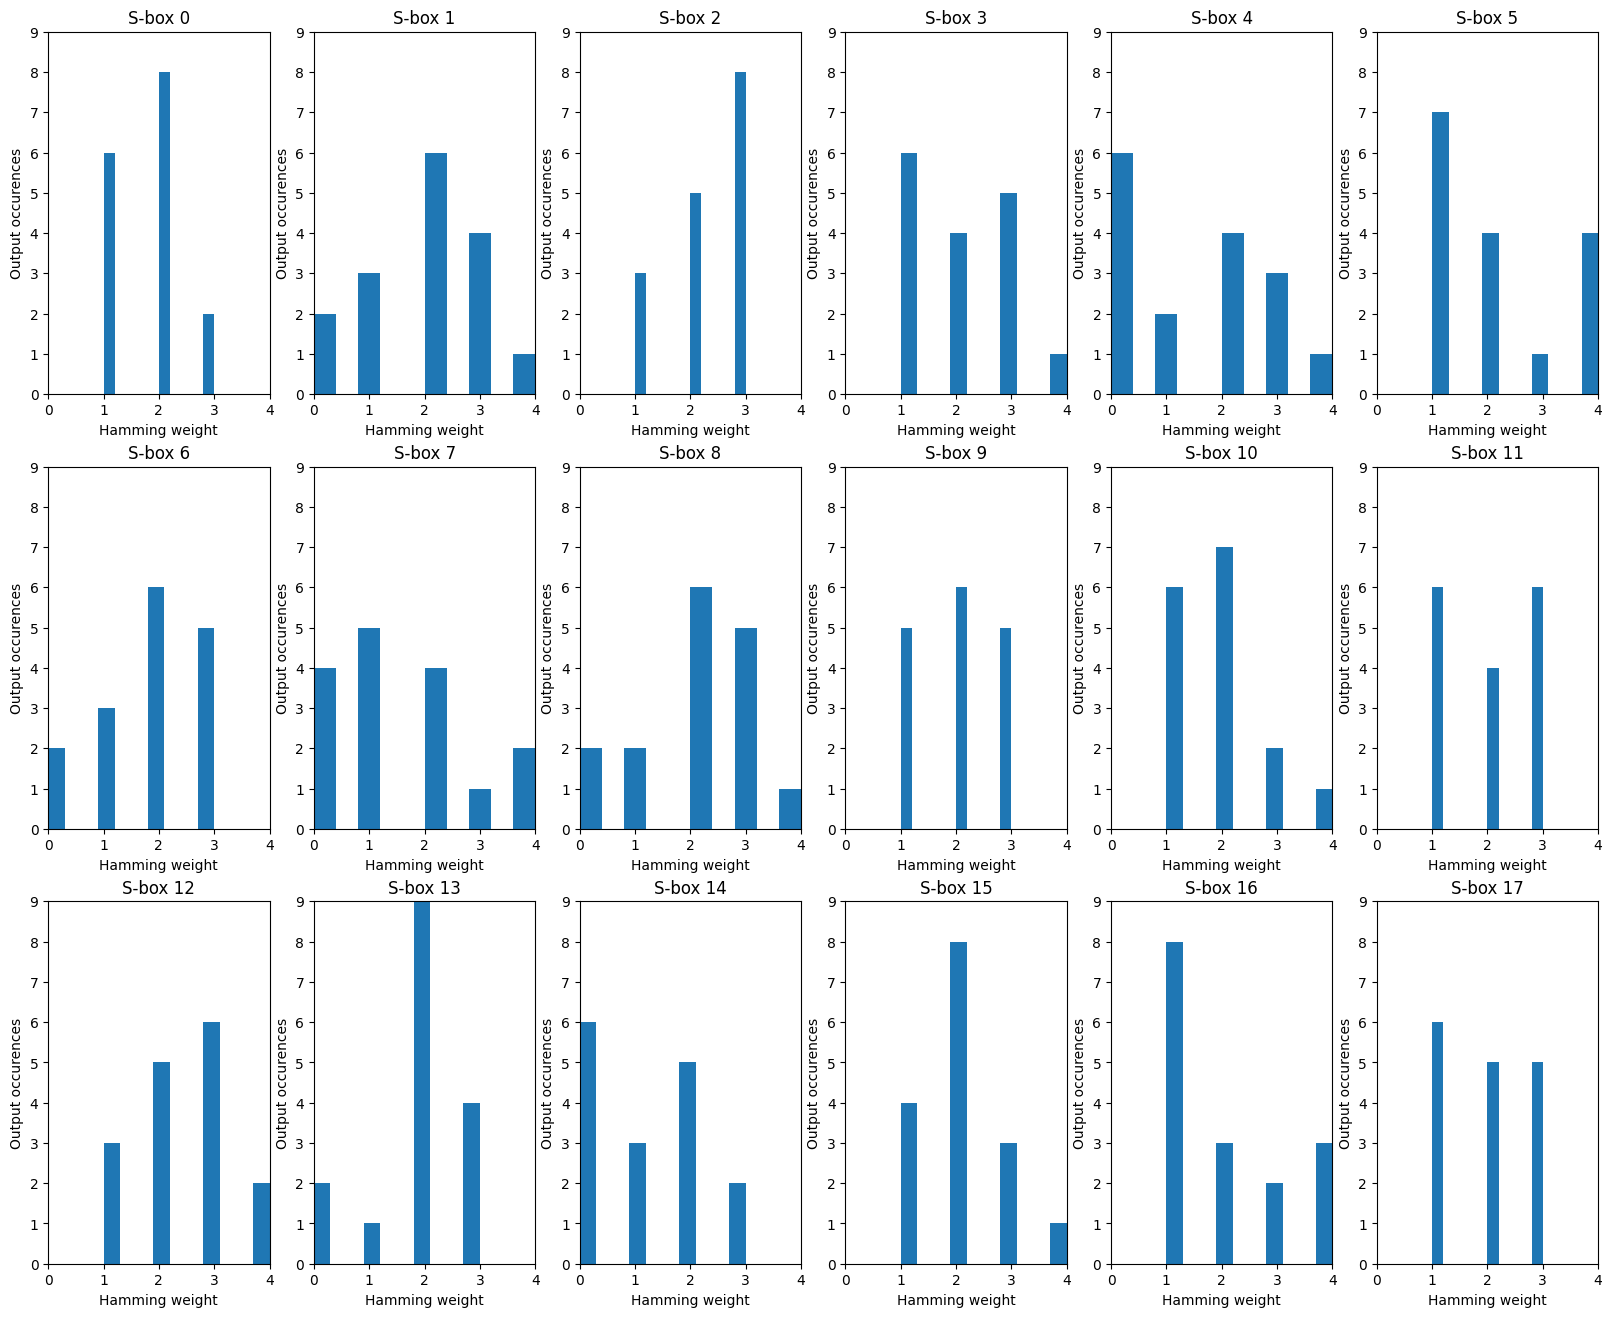

In [13]:
fig, axes = plt.subplots(3, 6, figsize=(20, 16))
for i in range(3):
    for j in range(6):
        axes[i, j].hist([HW[s_boxes_b4[i*6 + j][k]] for k in range(16)])
#        axes[i, j].hist([HD[s_boxes_b4[i*6 + j][k]][k] for k in range(16)], label="Distance", alpha=0.5)
        axes[i, j].set_ylim([0, 9])
        axes[i, j].set_ylabel("Output occurences")
        axes[i, j].set_xlim([0, 4])
        axes[i, j].set_xlabel("Hamming weight")
        axes[i, j].set_title(f"S-box {i*6 + j}")
#        axes[i, j].legend()


## HW[x[i]]

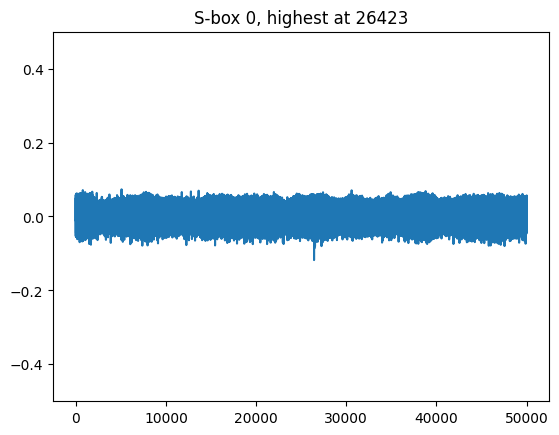

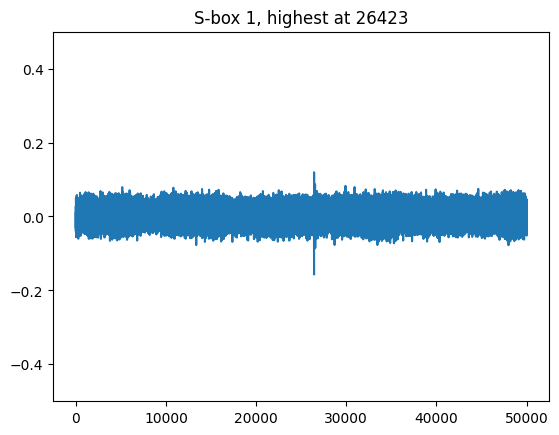

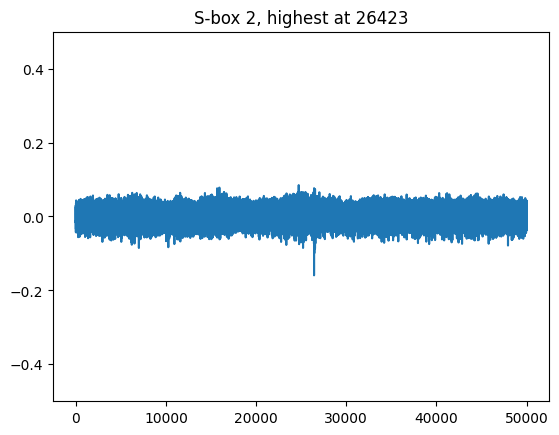

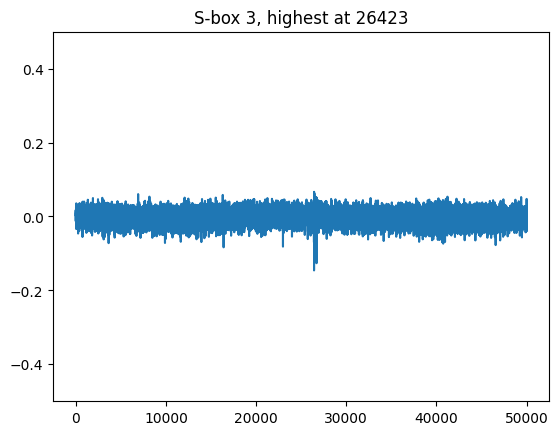

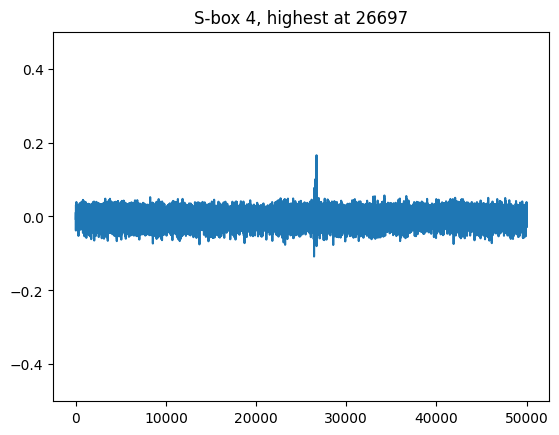

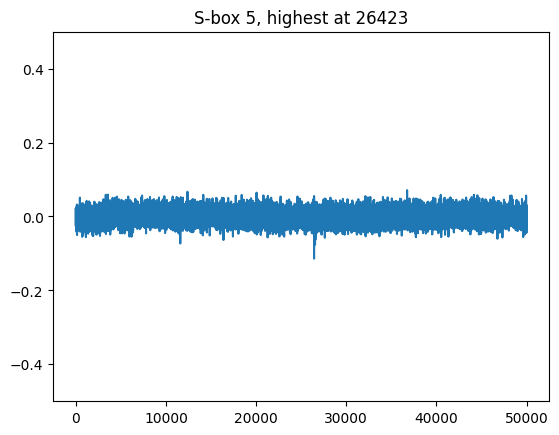

In [8]:
def hypotheses(sbox_inputs_all, sbox_outputs_all, sbox_idx):
    return [HW[inp] for inp, out in zip(sbox_inputs_all[sbox_idx], sbox_outputs_all[sbox_idx])]

for sbox_idx in range(6):
    corr = corr_coef(np.array(hypotheses(inputs, outputs, sbox_idx)), np.array(traces[sbox_idx]))
    loc = np.argmax(np.abs(corr))
    plt.plot(corr)
    plt.ylim([-0.5, 0.5])
    plt.title(f"S-box {sbox_idx}, highest at {loc}")
    plt.show()

## HW[sbox[x[i]]]

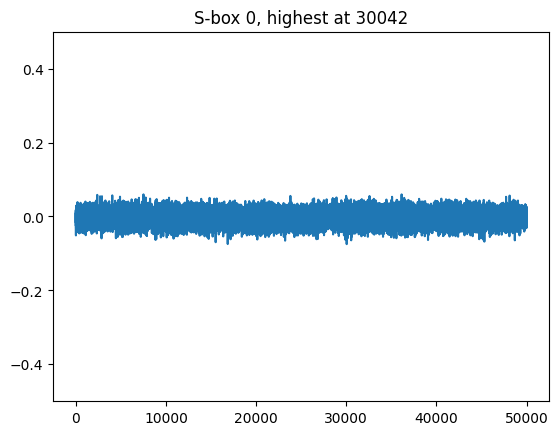

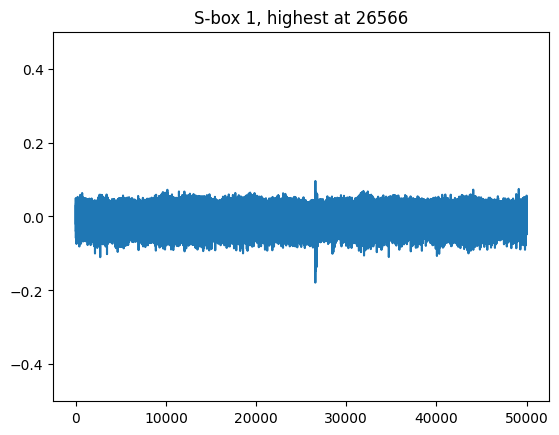

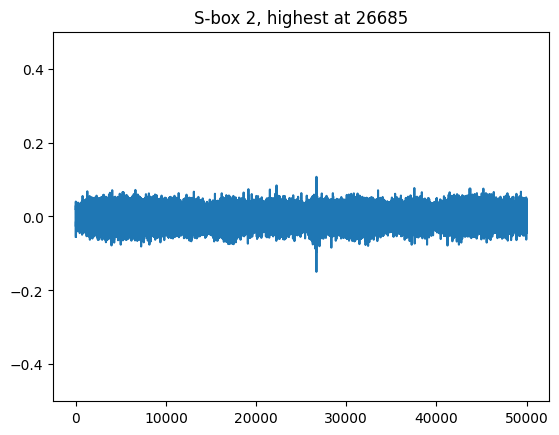

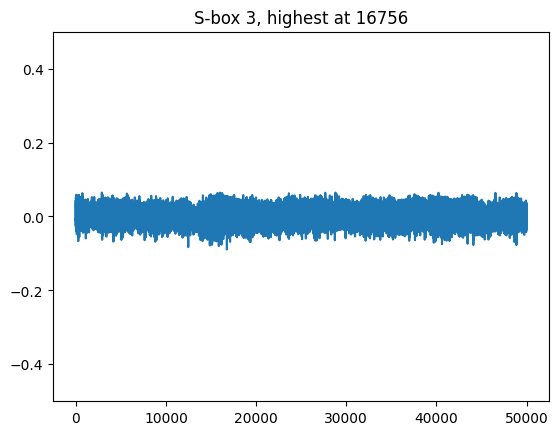

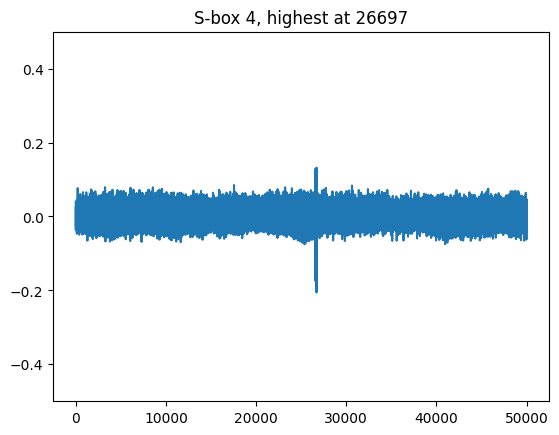

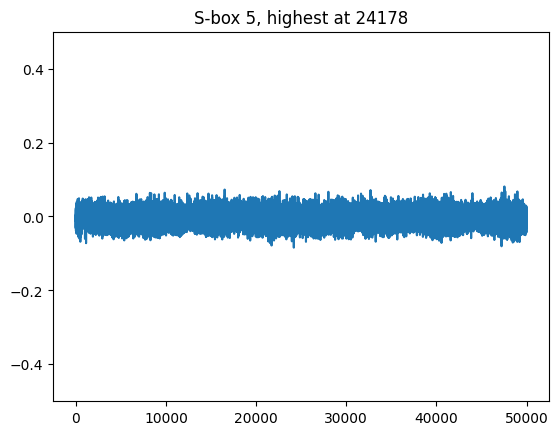

In [15]:
def hypotheses(sbox_inputs_all, sbox_outputs_all, sbox_idx):
    return [HW[out] for inp, out in zip(sbox_inputs_all[sbox_idx], sbox_outputs_all[sbox_idx])]

for sbox_idx in range(6):
    corr = corr_coef(np.array(hypotheses(inputs, outputs, sbox_idx)), np.array(traces[sbox_idx]))
    loc = np.argmax(np.abs(corr))
    plt.plot(corr)
    plt.ylim([-0.5, 0.5])
    plt.title(f"S-box {sbox_idx}, highest at {loc}")
    plt.show()

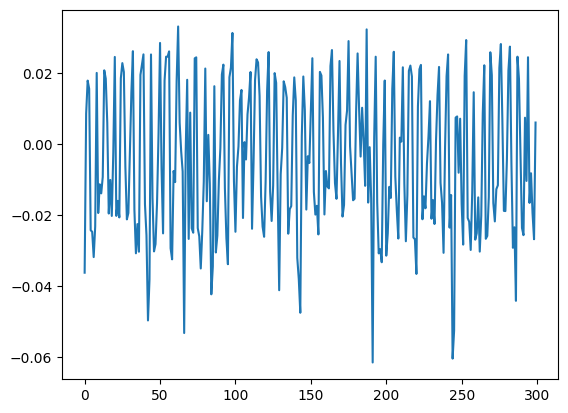

In [51]:
plt.plot(corr_coef(np.array(hypotheses(inputs, outputs, 0)), np.array(traces[0]))[26500:26800])

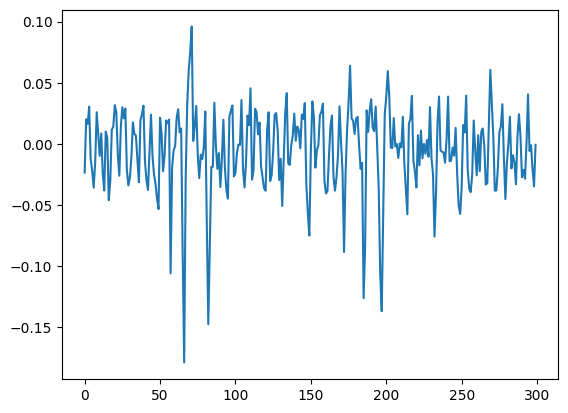

In [50]:
plt.plot(corr_coef(np.array(hypotheses(inputs, outputs, 1)), np.array(traces[1]))[26500:26800])

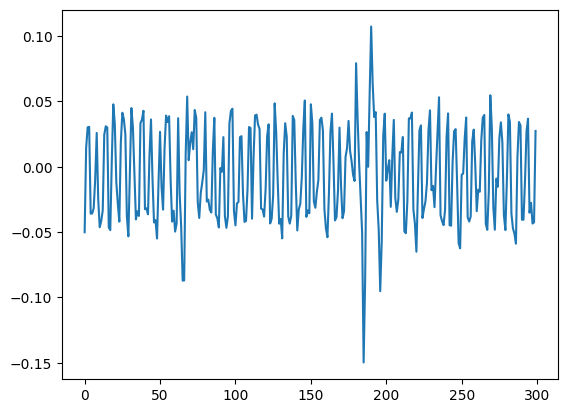

In [14]:
plt.plot(corr_coef(np.array(hypotheses(inputs, outputs, 2)), np.array(traces[2]))[26500:26800])

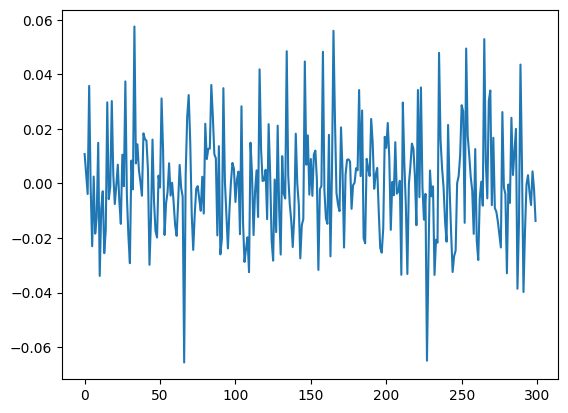

In [52]:
plt.plot(corr_coef(np.array(hypotheses(inputs, outputs, 3)), np.array(traces[3]))[26500:26800])

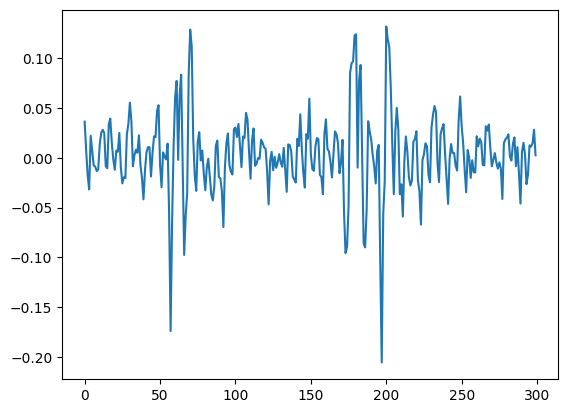

In [ ]:
plt.plot(corr_coef(np.array(hypotheses(inputs, outputs, 4)), np.array(traces[4]))[26500:26800])

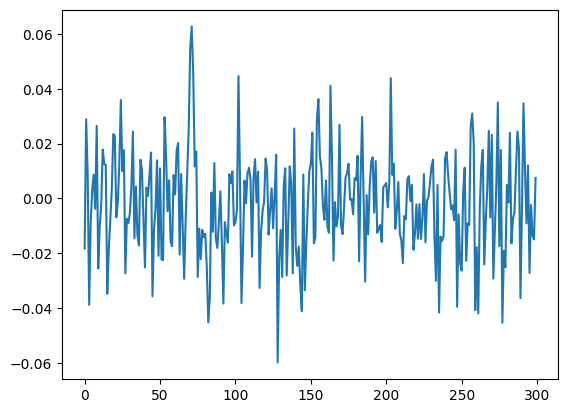

In [53]:
plt.plot(corr_coef(np.array(hypotheses(inputs, outputs, 5)), np.array(traces[5]))[26500:26800])

## More traces for S-boxes 0, 3 and 5

In [3]:
traces_path = "..\\acquisition\\debug_sboxes_0_3_5\\carto_eB4-Test-SBoxes-0-3-5.mat"
ins_outs_path = "..\\acquisition\\debug_sboxes_0_3_5\\carto_eB4-Test-SBoxes-0-3-5.log"

In [5]:
traces, inputs, outputs = load(traces_path, ins_outs_path)

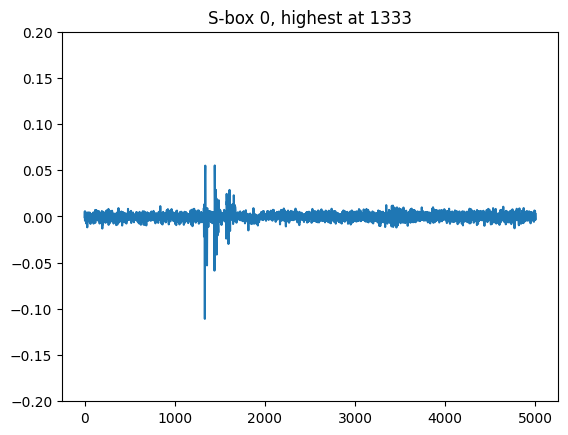

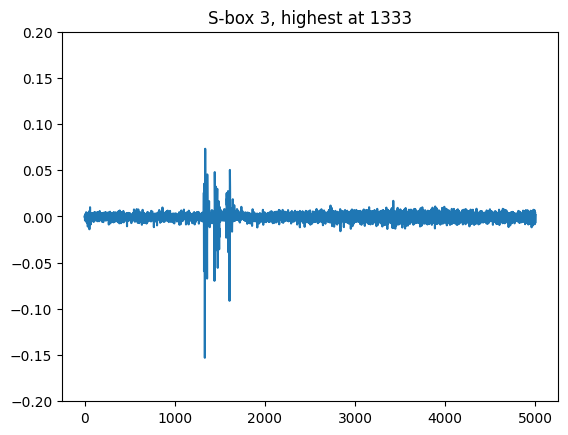

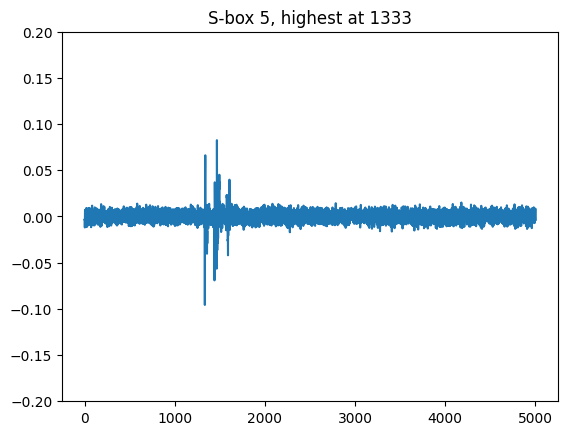

In [10]:
def hypotheses(sbox_inputs_all, sbox_outputs_all, sbox_idx):
    return [HW[inp] for inp, out in zip(sbox_inputs_all[sbox_idx], sbox_outputs_all[sbox_idx])]

for sbox_idx in [0, 3, 5]:
    corr = corr_coef(np.array(hypotheses(inputs, outputs, sbox_idx)), np.array(traces[sbox_idx]))
    loc = np.argmax(np.abs(corr))
    plt.plot(corr)
    plt.ylim([-0.2, 0.2])
    plt.title(f"S-box {sbox_idx}, highest at {loc}")
    plt.show()

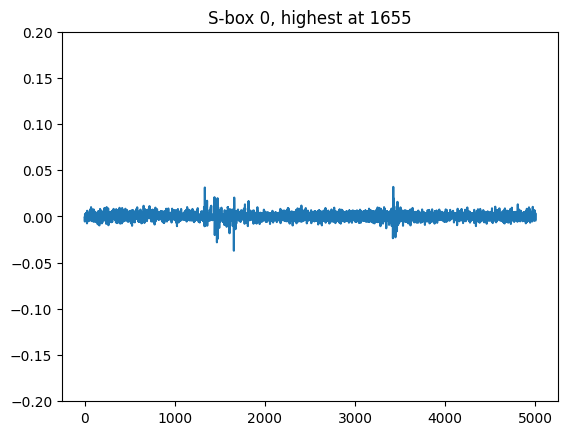

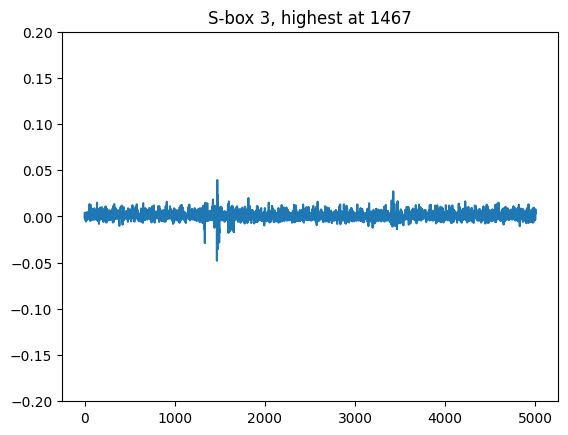

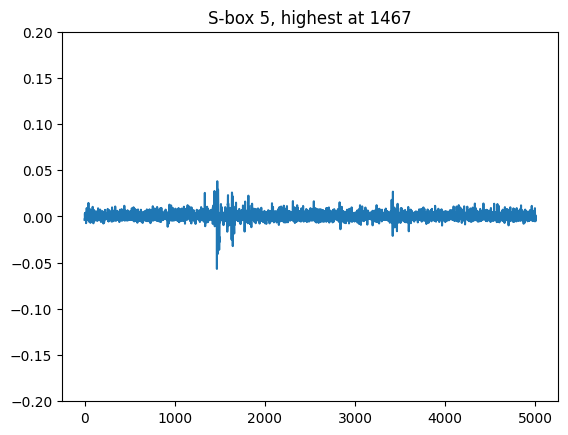

In [9]:
def hypotheses(sbox_inputs_all, sbox_outputs_all, sbox_idx):
    return [HW[out] for inp, out in zip(sbox_inputs_all[sbox_idx], sbox_outputs_all[sbox_idx])]

for sbox_idx in [0, 3, 5]:
    corr = corr_coef(np.array(hypotheses(inputs, outputs, sbox_idx)), np.array(traces[sbox_idx]))
    loc = np.argmax(np.abs(corr))
    plt.plot(corr)
    plt.ylim([-0.2, 0.2])
    plt.title(f"S-box {sbox_idx}, highest at {loc}")
    plt.show()

Better this time !